Using device: cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████| 9912422/9912422 [00:02<00:00, 3985085.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████████| 28881/28881 [00:00<00:00, 379308.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████████| 1648877/1648877 [00:02<00:00, 753810.22it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████| 4542/4542 [00:00<00:00, 1628667.93it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 0.08074959367513657


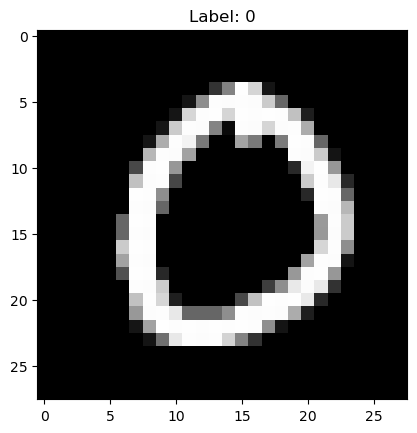

In [1]:
import torch
import torchvision
from torch import nn
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

# Check if CUDA is available and set PyTorch to use GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define a simple Convolutional Neural Network (CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # Input channels, output channels, kernel size
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 7, 500)
        self.fc2 = nn.Linear(500, 10)  # Output 10 classes for example
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten all dimensions except the batch
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load sample data
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

# Initialize the network and move it to GPU if available
model = SimpleCNN().to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(1):  # just 1 epoch for demonstration
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Display an image to show it's working
images, labels = next(iter(train_loader))
plt.imshow(images[0].squeeze(), cmap="gray")
plt.title(f'Label: {labels[0]}')
plt.show()
